## Challenge

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.



In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


%matplotlib inline

In [2]:
#Getting the dataset

raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratoring Data Analysis

In [4]:
c = 0
columns = []
for column in raw_data.columns:
    c+=1
    columns.append(column)
    print(column)
    
print('Total of columns: {}'.format(c))

title
rating
calories
protein
fat
sodium
#cakeweek
#wasteless
22-minute meals
3-ingredient recipes
30 days of groceries
advance prep required
alabama
alaska
alcoholic
almond
amaretto
anchovy
anise
anniversary
anthony bourdain
aperitif
appetizer
apple
apple juice
apricot
arizona
artichoke
arugula
asian pear
asparagus
aspen
atlanta
australia
avocado
back to school
backyard bbq
bacon
bake
banana
barley
basil
bass
bastille day
bean
beef
beef rib
beef shank
beef tenderloin
beer
beet
bell pepper
berry
beverly hills
birthday
biscuit
bitters
blackberry
blender
blue cheese
blueberry
boil
bok choy
bon appétit
bon app��tit
boston
bourbon
braise
bran
brandy
bread
breadcrumbs
breakfast
brie
brine
brisket
broccoli
broccoli rabe
broil
brooklyn
brown rice
brownie
brunch
brussel sprout
buffalo
buffet
bulgaria
bulgur
burrito
butter
buttermilk
butternut squash
butterscotch/caramel
cabbage
cake
california
calvados
cambridge
campari
camping
canada
candy
candy thermometer
cantaloupe
capers
caraway
cardamom


In [5]:
#Finding correlated features
#The first 35 most correlated

correlation=raw_data[columns].corr()
highest_correlated = correlation[correlation['rating'] > 0.01]['rating'].sort_values(ascending=False).iloc[0:35]
print(highest_correlated)

rating             1.000000
bon appétit        0.124549
peanut free        0.096087
soy free           0.092965
tree nut free      0.081347
bake               0.076978
roast              0.073499
fall               0.067343
sauté              0.066553
dinner             0.060957
kosher             0.059071
winter             0.055126
pescatarian        0.054034
thanksgiving       0.052990
onion              0.049997
grill/barbecue     0.048081
high fiber         0.047827
gourmet            0.047354
no sugar added     0.047197
tomato             0.046579
quick & easy       0.045216
herb               0.044253
pork               0.042463
beef               0.041550
cheese             0.041215
low carb           0.040738
mixer              0.040620
christmas          0.040595
sugar conscious    0.040573
braise             0.040155
low cal            0.038592
goat cheese        0.037763
meat               0.037551
marinate           0.037515
backyard bbq       0.037026
Name: rating, dtype:

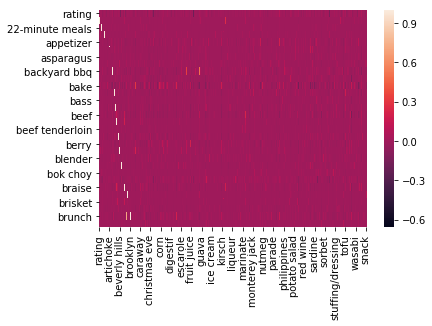

In [6]:
sns.heatmap(correlation[correlation['rating'] > 0.01].iloc[0:30])

In [7]:
#Creating the list of 30 selected features

selected_features = []

for variable in (highest_correlated.index):
    selected_features.append(variable)
    
selected_features.remove('rating')    

### Cleaning Data

In [8]:
# Count nulls 
null_count = raw_data[selected_features].isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

All null values are in yellow


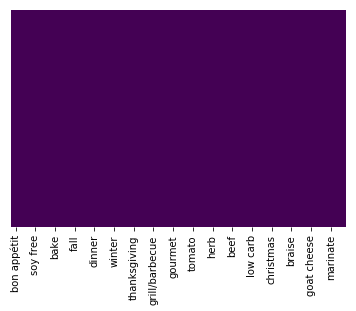

In [9]:
#Searching for null values

print('All null values are in yellow')      
sns.heatmap(raw_data[selected_features].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#Converting target variable from categorical to 

def convert(rating):
    
    '''
    Function name: convert convert a target column from categorical values to binary values (0,1)
    Parameters: a Dataframe column values to be converted
    Returns: 1 if column given is  > 3.5
             0 if column given is <= 3.5
    '''
    
    if rating > 3.5:
        return 1
    else:
        return 0
    


final_data = pd.DataFrame()     
final_data['rating'] = raw_data['rating'].apply(convert)

In [11]:
final_data.head()

,rating
0,0
1,1
2,1
3,1
4,0


### Creating the model

In [12]:

X = raw_data[selected_features]  
Y = final_data['rating']         

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)


svc = SVC()
svc.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predictions = svc.predict(X_test)

In [14]:
svc.score(X_train, y_train)

0.7936734112282702

In [16]:
print(confusion_matrix(y_test, predictions))

[[   0 1249]
 [   0 4767]]


In [18]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1249
          1       0.79      1.00      0.88      4767

avg / total       0.63      0.79      0.70      6016



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


____
By: Wendy Navarrete

08/24/2019